In [13]:
import pickle
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
from scipy import stats

In [2]:
dataset = 'human'#'simulated','human'

In [4]:
if dataset=='human':
    with open('../results/Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/interaction_keys_dict.pckl','rb') as f:
        intr_keys = pickle.load(f)
    with open('../results/Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/main_results_raw.pckl','rb') as f:
        attentions, positions, seqposes = pickle.load(f)
    df_intr = pd.read_csv('../results/Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.12.txt',sep='\t')
    filter_ICs = pd.read_csv('../results/Human_Promoter_Analysis_euclidean_v8/Motif_Analysis/table.txt')

elif dataset=='simulated':
    with open('../results/Simulated_Data_Analysis_Ours_consensus_euclidean_v8/Interactions_SATORI/interaction_keys_dict.pckl','rb') as f:
        intr_keys = pickle.load(f)
    with open('../results/Simulated_Data_Analysis_Ours_consensus_euclidean_v8/Interactions_SATORI/main_results_raw.pckl','rb') as f:
        attentions, positions, seqposes = pickle.load(f)
    df_intr = pd.read_csv('../results/Simulated_Data_Analysis_Ours_consensus_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.12.txt', sep='\t')
    filter_ICs = pd.read_csv('../results/Simulated_Data_Analysis_Ours_consensus_euclidean_v8/Motif_Analysis/table.txt')

In [5]:
df_intr = df_intr[df_intr['adjusted_pval']<0.05].reset_index(drop=True)

In [6]:
df_intr.shape

(562, 12)

In [7]:
raw_col = filter_ICs.columns[0]
cols = ['filter#'] + raw_col.split()
data = filter_ICs[raw_col].apply(lambda x: x.split()).tolist()
filter_ICs = pd.DataFrame(data, columns=cols)
filter_ICs['filter'] = filter_ICs['filter#'].apply(lambda x: f"filter{x}")

In [8]:
filter_ICs.head()

,filter#,consensus,annotation,ic,mean,std,filter
0,0,AGAGTGGAATTTG,SOX3,2.97,0.3439,0.5420,filter0
1,1,CAGCTCTCTAAAT,TLX2,4.56,0.3444,0.5333,filter1
2,2,TATAATAAGTTCG,SOX1,4.31,0.3170,0.5241,filter2
3,3,CCCCTATAGAAGG,.,3.15,0.3731,0.5545,filter3
4,4,CTCCGTAAACGAC,.,4.68,0.3378,0.5275,filter4


In [9]:
attns = []
for row in attentions:
    attns.append(row[row!=-1].mean())
attns = np.asarray(attns)

In [10]:
attns.shape

(19900,)

In [11]:
x = []
y = []
for key,index in intr_keys.items():
    filter1,filter2 = key.split('<-->')
    IC_filter1 = filter_ICs[filter_ICs['filter']==filter1]['ic']
    IC_filter2 = filter_ICs[filter_ICs['filter']==filter2]['ic']
    IC_sum = float(IC_filter1) + float(IC_filter2)
    x.append(IC_sum)
    y.append(attns[index])

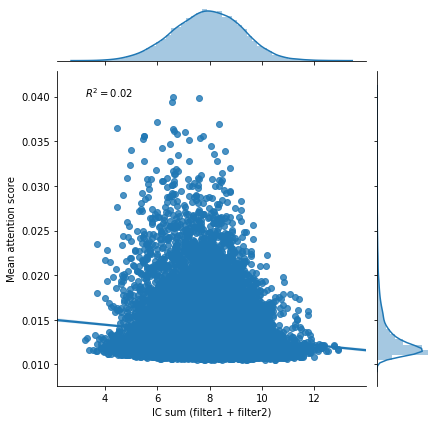

In [14]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

res = pd.DataFrame([x,y]).T
res.columns = ['IC sum', 'Mean attention score']
sns.jointplot(res['IC sum'], res['Mean attention score'], kind="reg")
r2val = r2(res['IC sum'], res['Mean attention score'])
plt.text(min(x),max(y),r'$R^2=$'+str(round(r2val,2)))
plt.xlabel('IC sum (filter1 + filter2)')
plt.show()

### For Simulated Data

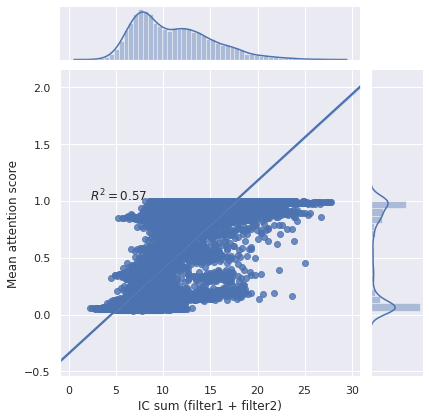

In [197]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

res = pd.DataFrame([x,y]).T
res.columns = ['IC sum', 'Mean attention score']
sns.jointplot(res['IC sum'], res['Mean attention score'], kind="reg")
r2val = r2(res['IC sum'], res['Mean attention score'])
plt.text(min(x),max(y),r'$R^2=$'+str(round(r2val,2)))
plt.xlabel('IC sum (filter1 + filter2)')
plt.show()